# Liberias

In [1]:
# from oficial python
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch
from matplotlib import cm
import matplotlib as mpl
from qutip import basis, concurrence, Qobj
import time
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import statistics
import os

# Propuesta para mostrar con mas puntos como esta prediciendo la red.
from mpl_toolkits.mplot3d import Axes3D




# own modules:
from dll.spin_procesor_modificated import Quantum_Spin_Proces
from dll.main_fun import make_IRIS_v2, w_r_json, _test, plot_data, visualization_1_qubit
from dll. baseline_dru_v2 import Modelo_DRU
from dll.models import qcircuit_1_qubit_mixed, qcircuit_1_qubit
from dll.cost_functions import fidelity_cost, Renyi_Divergence_0_5, Renyi_Divergence_2
from dll.gate_procesor_modificated import CompositeGateProcessor

# Funciones

In [39]:
def plot_concurrence(path):
  before, dict_samples_before_1_qubit = w_r_json('r', path)
  N_states_bl = len(dict_samples_before_1_qubit)
  dict_states_fidelities = []
  for i in range(N_states_bl):
      dict_bl = dict_samples_before_1_qubit[i]
      Fidelities_by_state = {}
      for key in dict_bl:
          state_bl_i = dict_bl[key].numpy()
          state_bl_i  = Qobj(state_bl_i)
          state_bl_i.dims = [[2, 2], [2, 2]]
          e = concurrence(state_bl_i)
          Fidelities_by_state[key] = e
      dict_states_fidelities.append(Fidelities_by_state)

  ket_labels = list(dict_states_fidelities[0].keys())
    #if entanglement == True and model.n_qubits == 2:
    #  ket_labels_e = []
    #  for i in range(len(dict_states_fidelities[0])):
    #    ket_labels_e.append()
  promedios = {ket: [] for ket in ket_labels}

  for diccionario in dict_states_fidelities:
      for ket, valor in diccionario.items():
          promedios[ket].append(valor)

    # Calcular el promedio para cada 'ket_1_qubit_i'
  promedios_mean = {ket: sum(valores) / len(valores) for ket, valores in promedios.items()}
  promedios_desviacion = {key: statistics.stdev(values) for key, values in promedios.items()}
  # Crear el diagrama de barras
  plt.figure(figsize=(12, 4))
  plt.grid()
  plt.bar(promedios_mean.keys(), promedios_mean.values(), yerr=list(promedios_desviacion.values()), capsize=5, color='blue', alpha=0.7)
  plt.xlabel('Qubits')
  plt.ylabel('Promedio')
  plt.title(f'Promedio de ket_{model.n_qubits}_qubits_i a través de diccionarios')
  plt.xticks(rotation=45)
  plt.ylim(min(promedios_mean.values()) - 0.1, max(promedios_mean.values()) + 0.5)
  plt.show()

En esta sección se define el data set de IRIS(3,3), se inicializa el modelo DRU (base line) para un qubit y se entrena con una funcion de costo basada en fidelidad, a 8 epocas. Es importante tener en cuenta que el hiper-parametro <save_process> permite guardar los resultados de entrenamiento:
  * Loss function train
  * Loss function test
  * Acc trin
  * Acc test

# Visualización por epocas

In [3]:
X, y =  make_IRIS_v2(2,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = 3, n_qubits = 1,
                   features = 2, alpha_noise = 0.0, save_process=True)
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters
paramters_1q, bias_1q = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [03:01<00:00, 22.75s/it]


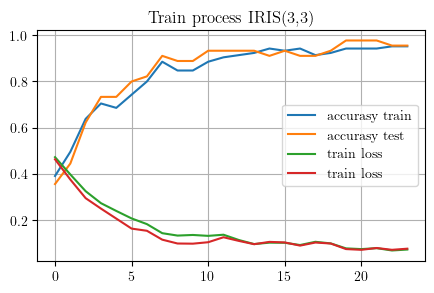

In [10]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()
plt.title("Train process IRIS(3,3)")
path_to_save_img = os.path.join("results_of_test","test_1","test_1_a.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

In [18]:
X, y =  make_IRIS_v2(2,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, Renyi_Divergence_0_5,
                   epochs = 8, n_clases = 3, n_qubits = 1,
                   features = 2, alpha_noise = 0.0, save_process=True)
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters
paramters_1q, bias_1q = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [03:19<00:00, 24.95s/it]


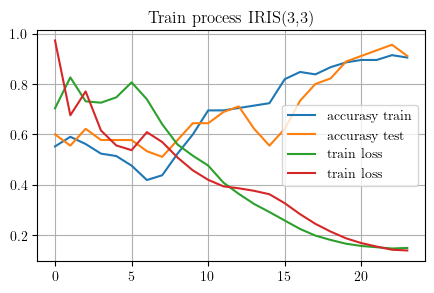

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()
plt.title("Train process IRIS(3,3)")
path_to_save_img = os.path.join("results_of_test","test_1","test_1_a_renyi.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

In [21]:
X, y =  make_IRIS_v2(2,3)

model = Modelo_DRU(qcircuit_1_qubit_mixed, Renyi_Divergence_2,
                   epochs = 8, n_clases = 3, n_qubits = 1,
                   features = 2, alpha_noise = 0.0, save_process=True)
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters
paramters_1q, bias_1q = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [03:08<00:00, 23.59s/it]


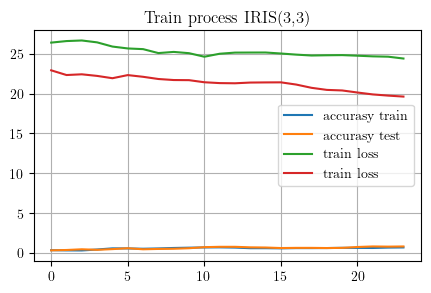

In [22]:
fig, ax = plt.subplots(figsize=(5, 3))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plt.plot(model.acc_train, label = 'accurasy train')
plt.plot(model.acc_test, label = 'accurasy test')
plt.plot(model.loss_list_train, label = 'train loss')
plt.plot(model.loss_list_test, label = 'train loss')
plt.grid()
plt.legend()
plt.title("Train process IRIS(3,3)")
path_to_save_img = os.path.join("results_of_test","test_1","test_1_a_renyi_2.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

# Visualizacion sobre la esfera de Bloch

In [2]:
# MOONS
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
n_clases = len(set(y)) # get number of classes
_, features = X.shape # get number of features

In [3]:
model = Modelo_DRU(qcircuit_1_qubit_mixed, fidelity_cost,
                   epochs = 8, n_clases = n_clases, n_qubits = 1,
                   features = features, alpha_noise = 0.0, save_process=False)

In [4]:
# get parameters after
params_after, bias_after = model.params, model.bias 

In [5]:
# splita data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# get parameters
paramters_before, bias_before = model.fit(X_train, y_train, X_test, y_test)

Epoch: 100%|██████████| 8/8 [00:38<00:00,  4.76s/it]


In [6]:
X = model.X_val
X.shape

(60, 3)

In [7]:
predicted_test, fidel_test = _test(qcircuit_1_qubit_mixed,
                                   params_after, model.X_train, model.y_train,
                                   model.state_labels,
                                   bias_after)

<Figure size 500x500 with 0 Axes>

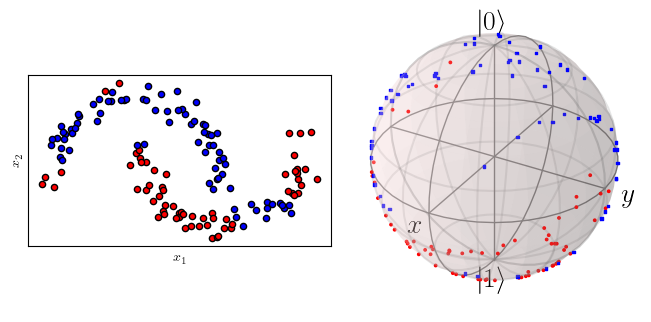

In [13]:
fig = plt.figure(constrained_layout=True)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
ax1 = fig.add_subplot(1, 2, 1)
plot_data(model.X_train, predicted_test, fig, ax1)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_aspect('equal')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
S = 3*np.ones((len(model.y_train)))
visualization_1_qubit(qcircuit_1_qubit, model.X_train, model.y_train, params_after, ax2, sz=S, bias=bias_after)
path_to_save_img = os.path.join("results_of_test","test_1","test_1_bloch_before.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()

In [9]:
predicted_test_before, fidel_test = _test(qcircuit_1_qubit_mixed,
                                   paramters_before, model.X_train, model.y_train,
                                   model.state_labels,
                                  bias_before)

<Figure size 500x500 with 0 Axes>

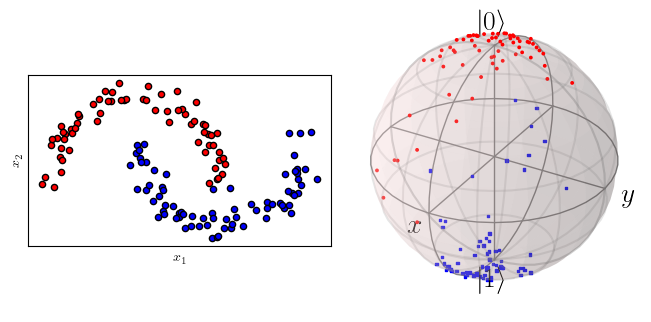

In [14]:
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'Times New Roman'
plot_data(model.X_train, predicted_test_before, fig, ax1)
ax1.set_xticks(())
ax1.set_yticks(())
ax1.set_aspect('equal')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
S = 3*np.ones((len(model.y_train)))
visualization_1_qubit(qcircuit_1_qubit, model.X_train, model.y_train, paramters_before, ax2, sz=S, bias=bias_before)
path_to_save_img = os.path.join("results_of_test","test_1","test_1_bloch_after.pdf")
plt.savefig(path_to_save_img , format='pdf', bbox_inches = 'tight')
plt.show()